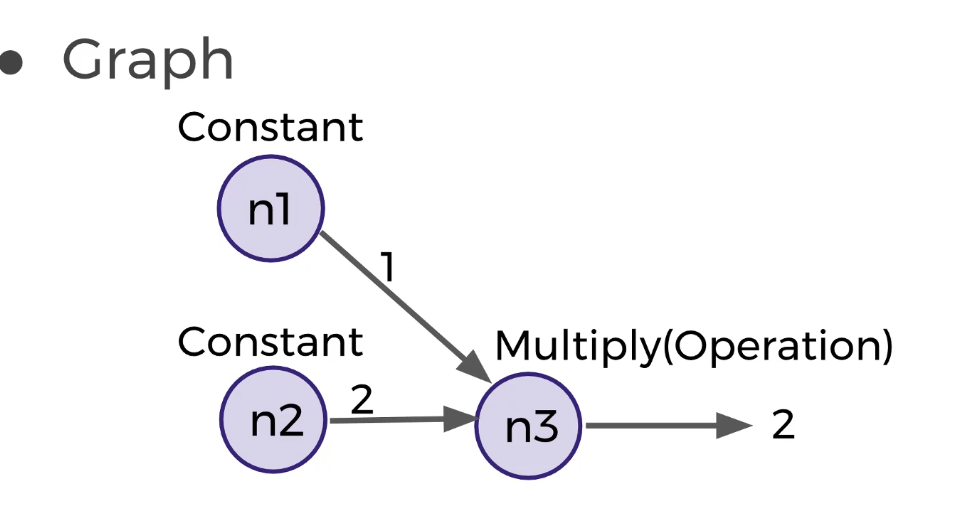

# Super Class

In [37]:
import numpy as np

In [1]:
class Operation():
    
    def __init__(self,input_nodes=[]):
        self.input_nodes = input_nodes
        self.output_nodes = []
        
        for node in input_nodes:
            node.output_nodes.append(self)
            
        _default_graph.operations.append(self)
    
    def compute(self):
        pass
    
    


## SubClasses

In [2]:
class add(Operation):
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,x_var,y_var):
        self.inputs = [x_var, y_var]
        return x_var + y_var
    

In [3]:
class multiply(Operation):
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,x_var,y_var):
        self.inputs = [x_var, y_var]
        return x_var * y_var
    

In [38]:
class matmul(Operation):
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,x_var,y_var):
        self.inputs = [x_var, y_var]
        return np.dot(x_var, y_var)
#         return x_var.dot(y_var)
    

In [39]:
class Placeholder():
    def __init__(self):
        self.output_nodes = []
        
        _default_graph.placeholders.append(self)

In [40]:
class Variable():
    
    def __init__(self,initial_value=None):
        
        self.value = initial_value
        self.output_nodes = []
        
        _default_graph.variables.append(self)

In [41]:
class Graph():
    
    def __init__(self):
        self.operations = []
        self.placeholders = []
        self.variables = []
        
    def set_as_default(self):
        global _default_graph
        _default_graph = self

## Working an Example

$$ z = Ax + b$$
$$A = 10$$
$$b = 1$$
$$z = 10x + 1$$

In [8]:
g = Graph()

In [9]:
g.set_as_default()

In [10]:
A = Variable(10)

In [11]:
b = Variable(1)

In [12]:
x = Placeholder()

In [13]:
z = add(multiply(A,x),b)

## Makesure that it runs in correct order

In [14]:
def traverse_postorder(operation):
    
    
    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)
        
    recurse(operation)
    return nodes_postorder

In [15]:
class Session():
    
    def run(self,operation,feed_dict={}):
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:
            
            if type(node) == Placeholder:
                node.output = feed_dict[node]
                print(feed_dict[node])
            
            elif type(node) == Variable:
                node.output = node.value
                
            else:
                node.inputs = [input_node.output for input_node in node.input_nodes]
                node.output = node.compute(*node.inputs)
            
            if type(node) == list:
                node.output = np.array(node.output)
        return operation.output

In [16]:
sess  = Session()


In [17]:
result = sess.run(operation=z, feed_dict={x:10})

10


In [18]:
result

101

# Classification

## Activation Function

In [42]:
import matplotlib.pyplot as plt
# import numpy as np
%matplotlib inline

In [43]:
def sigmoid(z):
    return 1/(1+ np.exp(-z))

In [44]:
sample_z = np.linspace(-10,10,100)
sample_a = sigmoid(sample_z)

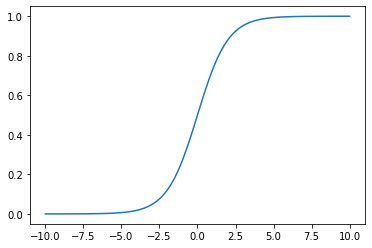

In [45]:
plt.plot(sample_z,sample_a)
plt.show()

In [46]:
class Sigmoid(Operation):
    def __init__(self,z):
        super().__init__([z])
        
    def compute(self,z_val):
        return 1/(1+np.exp(-z_val))
    

In [47]:
from sklearn.datasets import make_blobs

In [48]:
data = make_blobs(n_samples=50,n_features=2,centers=2,random_state=75)

In [49]:
data

(array([[  7.3402781 ,   9.36149154],
        [  9.13332743,   8.74906102],
        [  1.99243535,  -8.85885722],
        [  7.38443759,   7.72520389],
        [  7.97613887,   8.80878209],
        [  7.76974352,   9.50899462],
        [  8.3186688 ,  10.1026025 ],
        [  8.79588546,   7.28046702],
        [  9.81270381,   9.46968531],
        [  1.57961049,  -8.17089971],
        [  0.06441546,  -9.04982817],
        [  7.2075117 ,   7.04533624],
        [  9.10704928,   9.0272212 ],
        [  1.82921897,  -9.86956281],
        [  7.85036314,   7.986659  ],
        [  3.04605603,  -7.50486114],
        [  1.85582689,  -6.74473432],
        [  2.88603902,  -8.85261704],
        [ -1.20046211,  -9.55928542],
        [  2.00890845,  -9.78471782],
        [  7.68945113,   9.01706723],
        [  6.42356167,   8.33356412],
        [  8.15467319,   7.87489634],
        [  1.92000795,  -7.50953708],
        [  1.90073973,  -7.24386675],
        [  7.7605855 ,   7.05124418],
        [  6

In [50]:
features = data[0]
labels = data[1]

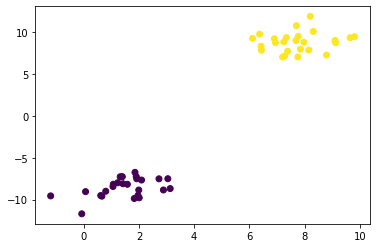

In [51]:
plt.scatter(features[:,0], features[:,1],c=labels)

## Required line approximation

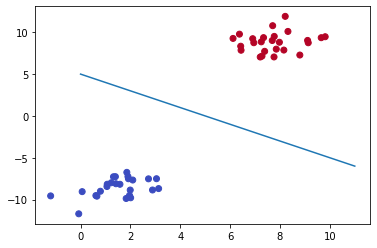

In [52]:
x = np.linspace(0,11,10)
y = -x + 5
plt.scatter(features[:,0], features[:,1],c=labels,cmap='coolwarm')
plt.plot(x,y)

In [53]:
g = Graph()

In [54]:
g.set_as_default()
x = Placeholder()
w = Variable([1,1])
b = Variable(-5)
z = add(matmul(w,x),b)
a = Sigmoid(z)


In [55]:
sess = Session()

In [56]:
sess.run(operation=a,feed_dict={x:[8,10]})

[8, 10]


0.999997739675702

In [57]:
sess.run(operation=a,feed_dict={x:[2,-10]})

[2, -10]


2.2603242979035746e-06